In [2]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
import matplotlib, collections
from scipy.stats import norm
import imp, os, pickle
from sklearn.metrics.pairwise import pairwise_distances
import warnings
from matplotlib import collections  as mc
warnings.filterwarnings("ignore")
sns.set(style="darkgrid")
colors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]


In [11]:
print "Setting the random seed to 0"
np.random.seed(0)

Setting the random seed to 0


In [12]:
cluster_distance   = np.load('../datasets/rnaseq/cluster_1_20k_dist_l1.npy')
best_arm           = cluster_distance.argmin()
best               = cluster_distance[:,best_arm]
n                  = cluster_distance.shape[0]
cluster_distance_f = cluster_distance.flatten()
estimate           = np.mean(cluster_distance, axis=0)
print estimate.shape

(20000,)


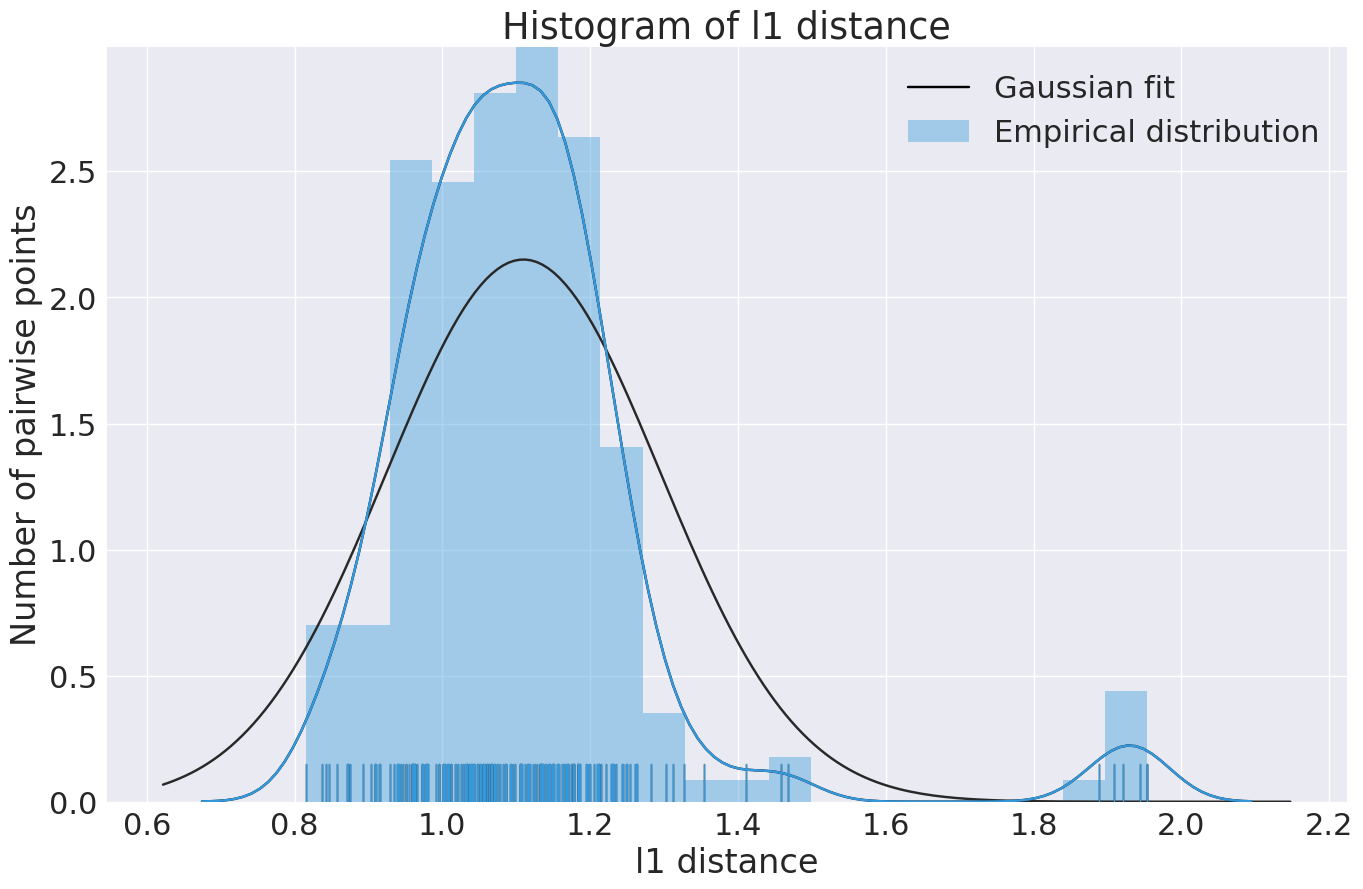

In [13]:

plt.figure(figsize=(16,10))
sns.set(font_scale = 2.2)
x = np.random.choice( cluster_distance_f, size=200,)
x = x[x.nonzero()]
fig = sns.distplot(x, fit=norm, color='black', rug=True,hist=False, bins=20, label="Gaussian fit")
fig = sns.distplot(x, norm_hist=True, color=colors[1], rug=True, bins=20, label="Empirical distribution")
fig.set(xlabel="l1 distance",  ylabel="Number of pairwise points" )
fig.set_title("Histogram of l1 distance")
fig.legend()
plt.show()

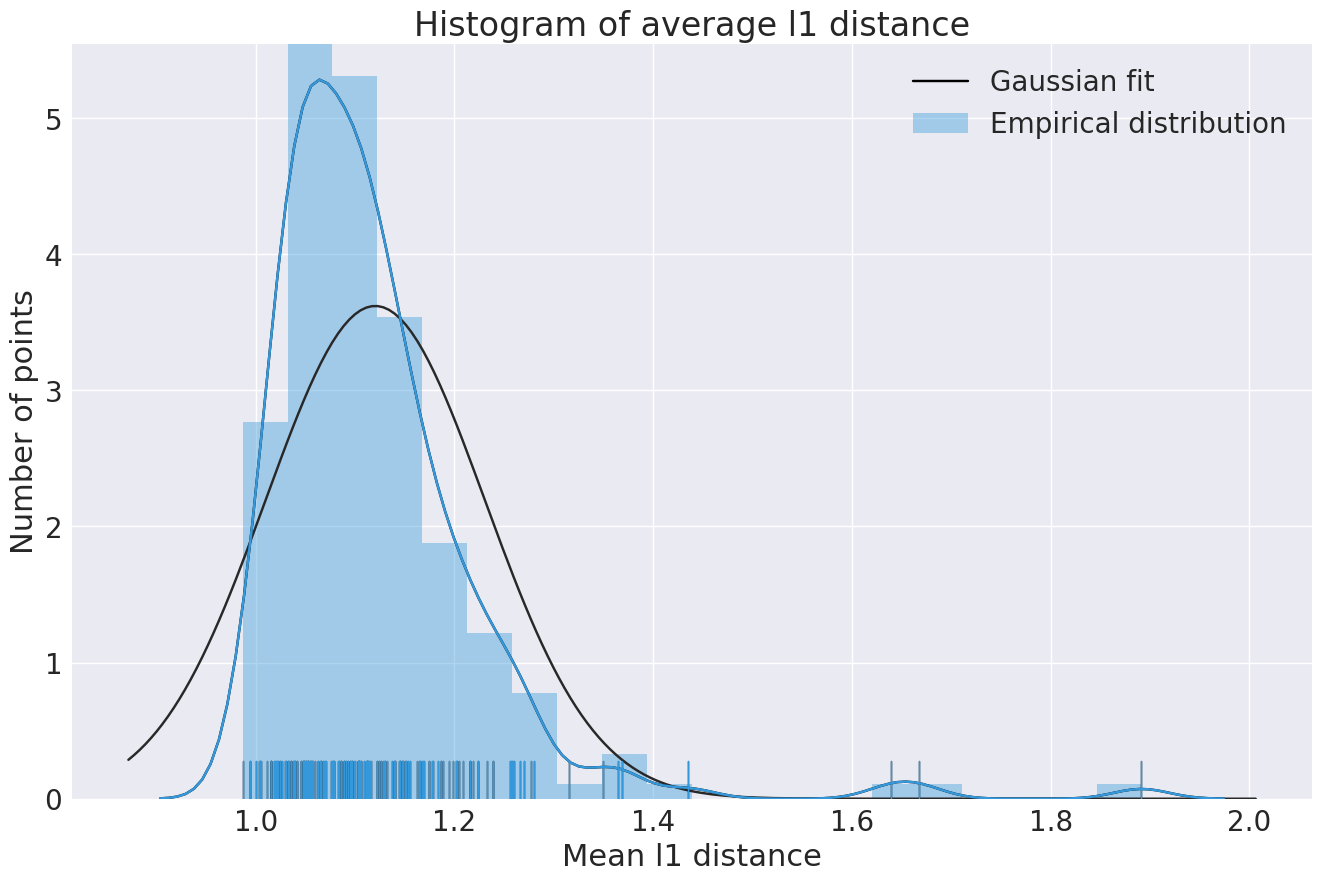

In [14]:
plt.figure(figsize=(16,10))
sns.set(font_scale = 2)
x = np.random.choice( estimate, size=200,)
fig = sns.distplot(x, fit=norm, color='black', rug=True,hist=False, bins=20, label="Gaussian fit")
fig = sns.distplot(x, norm_hist=True, color=colors[1], rug=True, bins=20, label="Empirical distribution")
fig.set(xlabel="Mean l1 distance", ylabel="Number of points" )
fig.set_title("Histogram of average l1 distance")

# fig.set_yticklabels(fig.get_x fontsize = 15)
# fig.set_xticklabels(summary_rand_df.columns,  fontsize = 15)
# fig.set_xlabel(fig.get_xlabel(), fontsize=18)
# fig.set_ylabel(fig.get_ylabel(), fontsize=20)

fig.legend()
plt.show()

0 63
1 3999
2 13278
3 13867


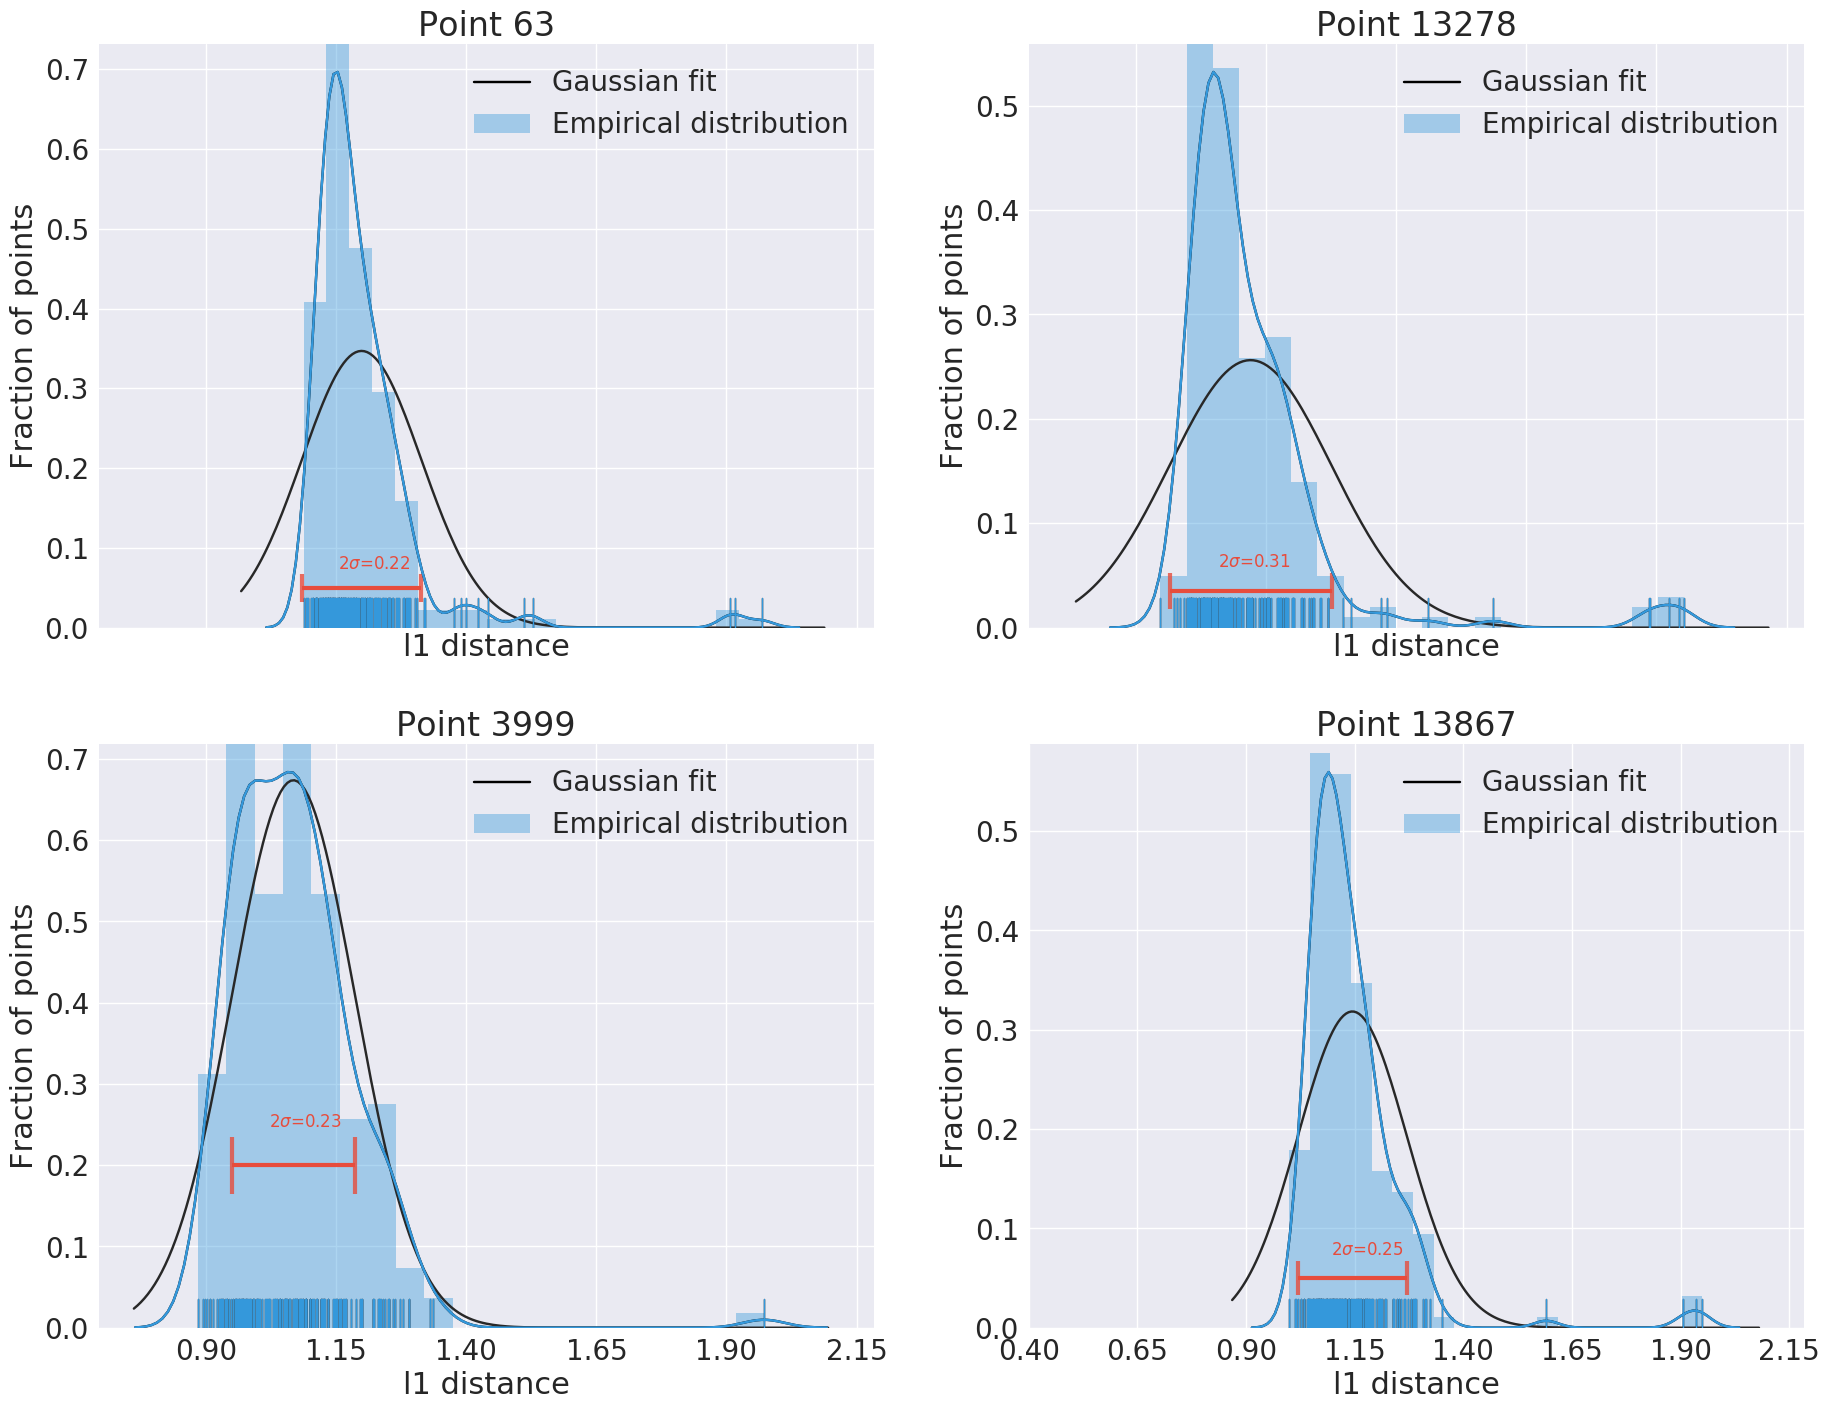

In [15]:
s = 2
indices = np.random.randint(n, size=4)
h_pos_array = [0.6, 0.5, .45, .5]
indices.sort()
f, axes = plt.subplots(s, s, figsize=(22, 17), sharex=True)
sns.set(font_scale = 2)
for i in range(s*s):
    index = indices[i]
    print i, index
    #Sampling only 1000 points for each randomly chosen point to reduce computation time
    data = cluster_distance[:,index]
    data = np.random.choice( data, size=200,)
    data = data[data.nonzero()]
    fig = sns.distplot(data, fit=norm, color='black', rug=True, 
                       hist=False, bins=20, label="Gaussian fit", ax=axes[i%s, i/s])
    fig = sns.distplot(data, norm_hist=True, color=colors[1], rug=True, 
                       bins=20, label="Empirical distribution", ax=axes[i%s, i/s])
    fig.set(xlabel="l1 distance",  ylabel="Fraction of points" )
    fig.set_xticks(np.arange(0.4, 2.25, .25))
    fig.set_yticklabels(np.arange(0,1,.1))

    gap =  .7
    h_pos = h_pos_array[i]
    h_lines = [ [(data.mean()-data.std(), h_pos), (data.mean()+data.std(), h_pos)] ]
    v_lines = [ [(data.mean()-data.std(), h_pos-gap/4), (data.mean()-data.std(), h_pos+gap/4)],
                [(data.mean()+data.std(), h_pos-gap/4), (data.mean()+data.std(), h_pos+gap/4)]  ]
    h_lc = mc.LineCollection(h_lines, linewidths=3, colors=colors[3], alpha=1)
    fig.add_collection(h_lc)
    v_lc = mc.LineCollection(v_lines, linewidths=3, colors=colors[3], alpha=.8)
    fig.add_collection(v_lc)
    two_sigma = int(2*data.std()*100)/100.
    fig.text(data.mean()-data.std()*.400, h_pos+gap/3, "$2\sigma$="+str(two_sigma), fontsize=12, color=colors[3])

    fig.legend()
    fig.set_title("Point "+str(index))

In [ ]:
imp.reload(utils)
path = '../data/1M_neurons_neuron20k.h5'
genome = "mm10"
gene_bc_matrix = utils.get_matrix_from_h5(path, genome)

gene_matrix_normalised = utils.normalise(gene_bc_matrix)
print gene_matrix_normalised.shape

print "In cluster with", gene_matrix_normalised.shape[0], "points",

# Variable initialization
n = gene_matrix_normalised.shape[0]
row = []
for i in range(1000):
    tmp = Counter(mab_results_2[:,i]).most_common()[0][0]
    if tmp in row:
        continue
    row += [tmp]
print row
order, distance_l1 = utils.Exact_Medoid(gene_matrix_normalised, row )

In [ ]:

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
y, x = np.histogram(estimate, bins=np.arange(.8,1.4,.02))
y = y/(sum(y)+0.0)
x = 0.5*x[:-1]+0.5*x[1:]
fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(16,10))
plt.plot(x, y, label="All points")
ax1.fill_between(x, y, alpha=.3)

y, x = np.histogram(distance_l1.mean(axis=0), bins=np.arange(.8,1.4,.01))
y = y/(sum(y)+0.0)
x = 0.5*x[:-1]+0.5*x[1:]
plt.plot(x, y, label= "Points with lowest distance estimate from UCB", color='red')
ax1.fill_between(x, y, alpha=.3, color='red')
plt.legend(prop={'size': 20})
plt.xlim(0.75,1.4)
plt.ylim(0.0,0.3)
plt.show()

In [ ]:
t = 50
row_r = []
for i in range(t):
    tmp = Counter(random_results_2[:,i]).most_common()[0][0]
    if tmp in row_r:
        tmp = Counter(random_results_2[:,i]).most_common()[1][0]
        if tmp in row_r:
            continue
    row_r += [tmp]
print row_r

row_m = []
for i in range(t):
    tmp = Counter(mab_results_2[:,i]).most_common()[0][0]
    if tmp in row_m:
        continue
    row_m += [tmp]
print row_m
print list(estimate.argsort()[:t])

In [ ]:
true_order = []
sns.set(font_scale = 1.5)

for elem in np.array(estimate.argsort()[:100]):
    if elem in np.array(summary_rand_df.index.astype('int')):
        true_order += [str(elem)]
print true_order
summary_rand_df2 = summary_rand_df.loc[true_order]
plt.figure(figsize=(16,13))
fig = sns.heatmap(summary_rand_df2, center = 0, 
            annot=True, linewidths=2.5, vmin=0, vmax=10)
fig.xaxis.tick_top()
fig.xaxis.set_label_position('top')
fig.set(xlabel="Computed Rank",  ylabel="Ranked arms (best on the top)")
fig.set_yticklabels(summary_rand_df2.index[::-1], rotation = 0, fontsize = 15)
fig.set_xticklabels(summary_rand_df2.columns,  fontsize = 15)
fig.set_xlabel(fig.get_xlabel(), fontsize=18)
fig.set_ylabel(fig.get_ylabel(), fontsize=20)

plt.show()


In [ ]:
true_order = []
for elem in np.array(estimate.argsort()[:100]):
    if elem in np.array(summary_mab_df.index.astype('int')):
        true_order += [str(elem)]
print true_order
summary_mab_df2 = summary_mab_df.loc[true_order]
plt.figure(figsize=(16,13))
fig = sns.heatmap(summary_mab_df2, center = 0, 
            annot=True, linewidths=2.5, vmin=0, vmax=10)
fig.xaxis.tick_top()
fig.xaxis.set_label_position('top')
fig.set(xlabel="Computed Rank",  ylabel="Ranked arms (best on the top)")
fig.set_yticklabels(summary_mab_df2.index[::-1], rotation = 0, fontsize = 15)
fig.set_xticklabels(summary_mab_df2.columns,  fontsize = 15)
fig.set_xlabel(fig.get_xlabel(), fontsize=18)
fig.set_ylabel(fig.get_ylabel(), fontsize=20)

plt.show()


In [ ]:
imp.reload(utils)
path = '../data/1M_neurons_neuron20k.h5'
genome = "mm10"
gene_bc_matrix = utils.get_matrix_from_h5(path, genome)
gene_matrix_normalised = utils.normalise(gene_bc_matrix)
summary, left_over_array, low_lcb_arms, lcb, ucb, estimate = utils.UCB( gene_matrix_normalised, report_time = 20 )

In [ ]:
fractional_values = np.array([.65, .5, .3, .1, .05, .03, 0.01, 0.001, .0001, 0.00001])
index = 1
fractional_positions = np.zeros_like(fractional_values)
for i, row in enumerate(left_over_array):
    frac = row[0].shape[0]/20000.0
    if frac > fractional_values[index]:
        fractional_positions[index] = i
    else:
        index += 1
print fractional_positions

size = 400
size_array = [0]
total_size=  0
for i, index in enumerate(fractional_positions):
    current_size = min(size, left_over_array[int(index)][0].shape[0])
    total_size += current_size
    size_array += [total_size]
print size_array
summary_df = pd.DataFrame(data=np.zeros((total_size, 2)), columns=['step', 'arm'], dtype=int)
for i, index in enumerate(fractional_positions):
    current_size = left_over_array[int(index)][0].shape[0]
    summary_df.iloc[size_array[i]:size_array[i+1]]['step'] = i
    summary_df.iloc[size_array[i]:size_array[i+1]]['arm'] = \
    np.random.choice( summary[int(index)][0][:current_size],size= min(size,current_size), replace=False)


pos = np.unique(np.array(summary_df['arm']))
print pos.shape
summary_df

distance = pairwise_distances(
                    gene_matrix_normalised, 
                    gene_matrix_normalised[pos],
                    metric='l1',
                    n_jobs=1)
df_dist = pd.DataFrame(data=np.vstack( [pos, distance.mean(axis=0)] ).T, columns=['arm', 'mean'] , dtype='float')
df_final = df_dist.merge(summary_df.astype('float'), right_on='arm', left_on='arm').sort_values('step')
df_final

filename = '../computed_values/rna_seq20k/figures/progress_plot_data'
# np.save(filename,distance)

In [ ]:
# 

In [ ]:
min_mu = np.array(df_final.iloc[-1])[1]
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
colors = pal.as_hex()
sns.set(font_scale = 2)
f, axes = plt.subplots(len(fractional_positions), figsize=(22, len(fractional_positions)*1.15), sharex=True)
for i in range(len(fractional_positions[:-1])):
    fig = sns.kdeplot( np.array(df_final.loc[df_final['step']==i]['mean']),\
                       ax=axes[i], color=colors[i%10], kernel='gau')
    x, y = fig.get_lines()[0].get_data()
    fig.set_yticks([])
    fig.set_xticks(np.arange(0.91,1.2,.04))
    fig.fill_between(x,y,0, alpha=.8, color=colors[i%10])
    f.subplots_adjust(wspace=0, hspace=0)
    ax = plt.gca()
    ax.text(-.04, len(fractional_positions) - i - .75, str(i*100/9)+"%", fontweight="bold", color=colors[i%10], 
            ha="left", va="center", transform=ax.transAxes, fontsize=16)
i = i + 1
final_mean = np.array(df_final.loc[df_final['step']==i]['mean'])[0]
x = np.arange(final_mean-.0004,final_mean+.0004,.00001)
y = 0.03*np.ones_like(x)
fig = sns.kdeplot( x, ax=axes[i], color=colors[i%10], kernel='cos')
# x, y = fig.get_lines()[0].get_data()
fig.fill_between(x, y*40500, 0, alpha=.8, color=colors[-1])
fig.set_yticks([])
ax.text(-.04, len(fractional_positions) - i - .75, str(i*100/9)+"%", fontweight="bold", color=colors[i%10], 
            ha="left", va="center", transform=ax.transAxes, fontsize=16)
# plt.stem(, [.03], color=colors[i], linewidth=5, MarkerSize=30, linefmt='b')
plt.show()

In [ ]:
colors2 = sns.color_palette("hls", 8)
sns.palplot(colors2)


In [ ]:
imp.reload(utils)
summary, left_over_array, low_lcb_arms, lcb, ucb, estimate, T = utils.UCB( gene_matrix_normalised, report_time = 20 )
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(16,10))
order = estimate.argsort()
size = 70
sns.set(font_scale = 2.2)
x = np.arange(0,size)
y = estimate[order][:size]
diff_l = y - lcb[order][:size]
diff_u = ucb[order][:size] - y
# distance = pairwise_distances(
#                     gene_matrix_normalised, 
#                     gene_matrix_normalised[order[:size]],
#                     metric='l1',
#                     n_jobs=1)
true_estimate = distance.mean(axis=0)[:size]
y[np.where((diff_l==0)&(diff_u==0))] = true_estimate[np.where((diff_l==0)&(diff_u==0))]
fig = plt.plot(x, y, label='$\hat{\mu}_i$', color=colors2[-1])

fig = plt.plot(x, true_estimate, label='$\mu_i$', color=colors2[0], alpha=.75)
ax.fill_between(x, y, y-diff_l, facecolor=colors2[-3], alpha= 0.25, interpolate=True)
ax.fill_between(x, y+diff_u, y, facecolor=colors2[-3], alpha= 0.25, interpolate=True)
plt.plot(x, y-diff_l,  color = colors2[-3], alpha=0.38)
plt.plot(x, y+diff_u,  color = colors2[-3], alpha=0.38)
plt.axhline(y[0], linestyle='--', alpha=0.5)
plt.legend(prop={'size': 20})
plt.xticks(np.arange(0,size,10))
plt.yticks(np.arange(.96, 1.02, .01))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.xlabel('$i$', fontsize=21)
plt.ylabel('distance', fontsize=21)
plt.title('Arms ranked by $\hat{\mu}_i$')
plt.tight_layout()

plt.show()

In [ ]:
imp.reload(utils)
# summary, left_over_array, low_lcb_arms, lcb, ucb, estimate, T = utils.UCB( gene_matrix_normalised, report_time = 20 )
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(20,20))
x_range = np.arange(7,12,1)
fig = plt.plot(x, y, label='$\hat{\mu}_i$', color=colors2[-1])

fig = plt.plot(x[x_range], true_estimate[x_range], label='$\mu_i$', color=colors2[0], alpha=.75)
ax.fill_between(x[x_range], y[x_range], y[x_range]-diff_l[x_range], facecolor=colors2[-3], alpha= 0.25, interpolate=True)
ax.fill_between(x[x_range], y[x_range]+diff_u[x_range], y[x_range], facecolor=colors2[-3], alpha= 0.25, interpolate=True)
# plt.plot(x, y-diff_l,  color = colors2[-3], alpha=0.38)
# plt.plot(x, y+diff_u,  color = colors2[-3], alpha=0.38)
plt.axhline(estimate[order][0], linestyle='--', lw=20)
plt.xticks(np.arange(0,size,20))
plt.yticks(np.arange(.96, 1.02, .01))
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
plt.tight_layout()
plt.xlim((8,12))
plt.ylim((.955,.96))
plt.show()

In [18]:
random_folder = '../experiments/rnaseq20k/rand/'
truths = np.zeros((47,))
for flname in os.listdir(random_folder):
    if not flname.endswith('.pkl'):
        continue
    with open(random_folder+flname,'rb') as f:
        x=pickle.load(f)
        truths += [z[0]==103077 for z in x]    

truths = np.array(truths)/(len(os.listdir(random_folder))+0.0)
mab_folder = '../experiments/rnaseq20k/meddit/'
mab = []
m = 15000
print len(os.listdir(mab_folder))
for flname in os.listdir(mab_folder):
    if not flname.endswith('.pkl'):
        continue
    print flname,
    try:
        with open(mab_folder+flname,'rb') as f:
            x=pickle.load(f)
            answer = x[0][:np.where(x[0]==0)[0][0]]
            mab += [np.pad(answer==103077, (0,m-len(answer)), 'edge')]    
    except:
        print "fuck", flname
mab_error = 1-np.array(mab).mean(axis=0)
mab_arm = 32+np.arange(0, mab_error.shape[0])*32*32/110000.0

 13
0.pkl 1.pkl 3.pkl 2.pkl fuck

NameError: name 'f1name' is not defined